# Predicting Breast Cancer Based on Cell Nucleus Characteristics

#### Overview

This dataset is from the Diagnostic Wisconsin Breast Cancer Database. The features were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and they describe the chractersitics of the cell nuclei in the image. In this project, we aim to build a model that predicts whether a cell is benign or malignant based on these characteristics. Malignant cells indicate the prescence of cancer cells while benign cells are cancer free.

In [38]:
# import in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [39]:
# read in the data
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset has these attribute information: 

    a) id - a unique identifier for each sample
    b) diagnosis - (M = malignant, B = benign)
        - We will have M = 1 and B = 0

Additionally, we can see that there are ten real-valued features are computed for each cell nucleus:

    a) radius - mean of distances from center to points on the perimeter
    b) texture - standard deviation of gray-scale values
    c) perimeter - measurement of cell size
    d) area - measurement of cell size
    e) smoothness - local variation in radius lengths
    f) compactness - calculated with: perimeter^2 / area - 1.0
    g) concavity - severity of concave portions of the contour
    h) concave points - number of concave portions of the contour
    i) symmetry - how symmetrical the cell is
    j) fractal dimension - "coastline approximation" - 1

In [41]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [42]:
# see how many M and B values there are
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

We have around a 40/60 split of malignant and benign cells, with a total of 569 samples.

### Data Cleaning
Now, let's clean the data. We'll be looking to see if there are any missing values and dropping the unnecessary columns.

In [43]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [44]:
data = data.drop(['Unnamed: 32','id'],axis=1)

In [45]:
# set M to 1 and B to 0
data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})

### Data Visualization

<Axes: >

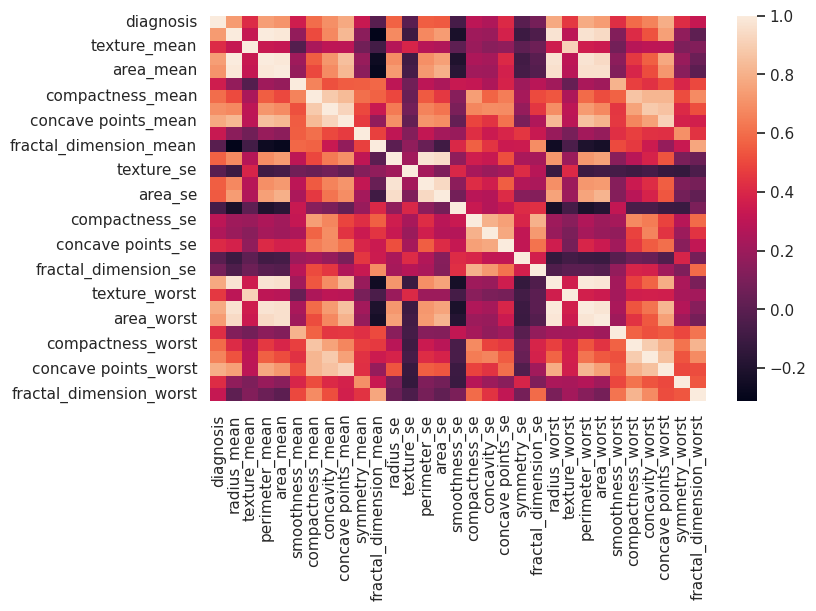

In [46]:
sns.set()
sns.heatmap(data.corr())

KeyboardInterrupt: 

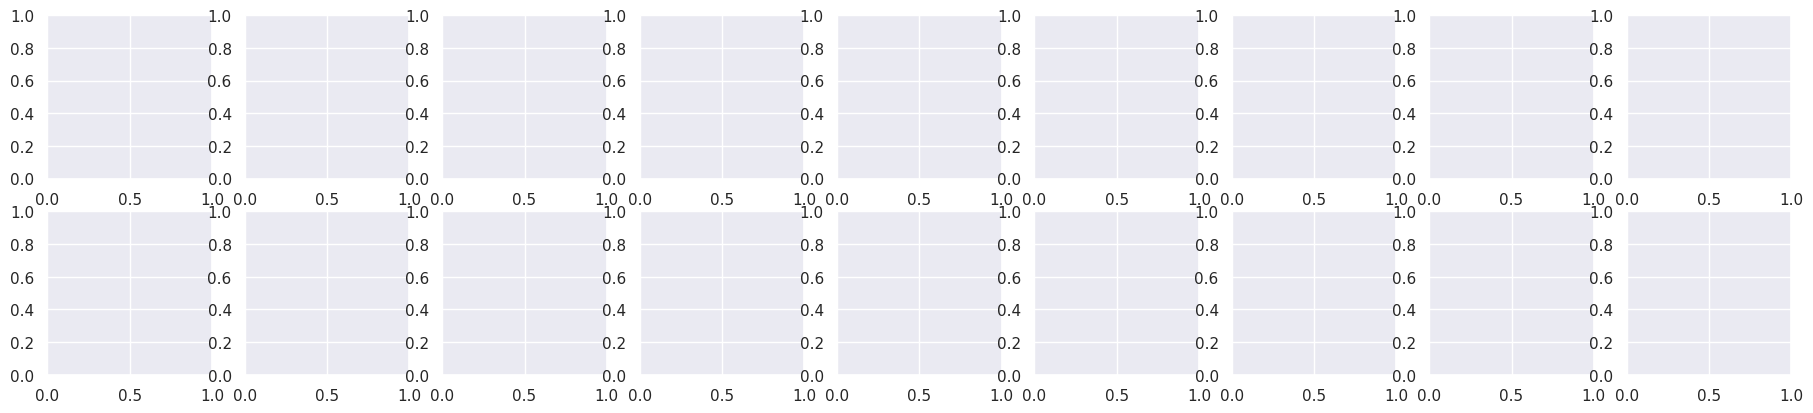

In [47]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=data[cols],hue='diagnosis')

### Model Architecture

We will be doing two different models: support vector machine (SVM) and k-nearest neighbors (KNN) algorithm.

In [ ]:
# set dependent and independent variable
X = data.drop('diagnosis',axis=1).values
y = data['diagnosis'].values

In [ ]:
# split the dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# scale the data
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# SVM
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

### Model Evaluation

In [ ]:
models = []

Z = [SVC() , KNeighborsClassifier()]


X = ["SVM" , "KNeighborsClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))   

In [ ]:
d = { "Accuracy" : models , "Algorithm" : X }
data_acc = pd.DataFrame(d)
data_acc

We can see that the SVM model had the highest accuracy at 98%, which is really good!

In [ ]:
# create a confusion matrix
conmat = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))
confusion_mat = pd.DataFrame(conmat, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
confusion_mat

We used a confusion matrix to measure the performance of our machine learning algorithm. Our confusion matrix has a high number of true positives and true negatives, indicating accurate predictions. Based on this, we can see that our model performed quite well.

### Conclusion

The confusion matrix, and with an accuracy of 98%, indicates that our model is performing very well in distinguishing between benign and malignant cells. Specifically, the high number of true positives (71) and true negatives (41) reflects the model's ability to correctly identify instances of both classes. The absence of false negatives is particularly crucial in the context of cancer diagnosis, as it suggests that the model is effective in minimizing the risk of overlooking potentially malignant cells.

However, it is important to note that, in the context of medical applications, other evaluation metrics such as sensitivity, specificity, precision, and recall are also essential to consider. These other metrics provide a more nuanced understanding of the model's performance, especially in scenarios where the costs of false positives or false negatives differ and we could implement them in the future.